In [285]:
import numpy as np
from keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [286]:
#Retrieving the MNIST data

x, y = fetch_openml('mnist_784', version = 1, return_X_y = True)

In [287]:
#Splitting up x and y into test and train sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10000)

In [288]:
#Normalizing the data

x_train /= 255
x_test /= 255

In [289]:
#Changing numpy array of strings into ints for y

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [290]:
#Xavier initialization for weights

def initialize_weights_biases():  
    init_parameters = {}
    init_parameters['W1'] = np.random.randn(10, 784) * np.sqrt(1 / 10)
    init_parameters['W2'] = np.random.randn(10, 10) * np.sqrt(1 / 10)
    init_parameters['b1'] = np.zeros((10, 1))
    init_parameters['b2'] = np.zeros((10, 1))
    
    return init_parameters

In [291]:
#Activation functions

def ReLU(Z):
    return np.maximum(Z, 0)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [292]:
#Using ReLU as the first activation function, sigmoid as second

def forward_propagation(init_parameters, x):
    forward_parameters = {}
    forward_parameters['A0'] = x
    forward_parameters['Z1'] = np.dot(init_parameters['W1'], forward_parameters['A0']) + init_parameters['b1']
    forward_parameters['A1'] = ReLU(forward_parameters['Z1'])
    forward_parameters['Z2'] = np.dot(init_parameters['W2'], forward_parameters['A1']) + init_parameters['b2']
    forward_parameters['A2'] = sigmoid(forward_parameters['Z2'])
    
    return forward_parameters

In [293]:
#Derivatives of activation functions for back propagation

def d_ReLU(Z):
    return 1 * (Z > 0)

def d_sigmoid(Z):
    return (np.exp(-Z)) / ((np.exp(-Z) + 1) ** 2)

In [294]:
#Back propagation to be used to update weights and biases

def back_propagation(forward_parameters, init_parameters, x, y, m):
    back_parameters = {}
    new_y = to_categorical(y).T
    dZ2 = forward_parameters['A2'] - new_y
    back_parameters['dW2'] = np.dot(dZ2, forward_parameters['A1'].T) / m
    back_parameters['db2'] = np.sum(dZ2) / m
    dZ1 = np.dot(init_parameters['W2'].T, dZ2) * d_ReLU(forward_parameters['Z1'])
    back_parameters['dW1'] = np.dot(dZ1, forward_parameters['A0'].T) / m
    back_parameters['db1'] = np.sum(dZ1) / m
    
    return back_parameters

In [295]:
#Updating weights and biases for the next epoch

def update_parameters(init_parameters, back_parameters, learning_rate):
    init_parameters['W1'] -= learning_rate * back_parameters['dW1']
    init_parameters['W2'] -= learning_rate * back_parameters['dW2']
    init_parameters['b1'] -= learning_rate * back_parameters['db1']
    init_parameters['b2'] -= learning_rate * back_parameters['db2']
    
    return

In [296]:
#Training the neural network to distinguish digits from the MNIST data
#Optionally shows accuracy for given intervals, off by default

def begin_training(x, y, learning_rate, epochs, m, showProgress = 0):
    init_parameters = initialize_weights_biases()
    for i in range(epochs):
        forward_parameters = forward_propagation(init_parameters, x)
        back_parameters = back_propagation(forward_parameters, init_parameters, x, y, m)
        update_parameters(init_parameters, back_parameters, learning_rate)
        if showProgress > 0:
            if i % showProgress == 0:
                print(str(i) + ": " + str(np.sum(np.argmax(forward_parameters['A2'], 0) == y) / y.size) + "%")
                
    return init_parameters

In [297]:
results = begin_training(x_train.T, y_train.T, 0.10, 500, 70000, 10)

0: 0.06621666666666666%
10: 0.16086666666666666%
20: 0.25015%
30: 0.2993166666666667%
40: 0.33026666666666665%
50: 0.35345%
60: 0.37245%
70: 0.39208333333333334%
80: 0.40976666666666667%
90: 0.4278166666666667%
100: 0.44575%
110: 0.46265%
120: 0.48168333333333335%
130: 0.5027%
140: 0.5278166666666667%
150: 0.55245%
160: 0.5749833333333333%
170: 0.5945333333333334%
180: 0.6113%
190: 0.6259166666666667%
200: 0.6375333333333333%
210: 0.6466333333333333%
220: 0.6554333333333333%
230: 0.6632666666666667%
240: 0.67015%
250: 0.6763666666666667%
260: 0.6829333333333333%
270: 0.6884%
280: 0.6934833333333333%
290: 0.6987333333333333%
300: 0.7033166666666667%
310: 0.7084666666666667%
320: 0.7139333333333333%
330: 0.7196166666666667%
340: 0.7254%
350: 0.7311666666666666%
360: 0.7370833333333333%
370: 0.74275%
380: 0.74855%
390: 0.7541166666666667%
400: 0.7593%
410: 0.7647166666666667%
420: 0.7699666666666667%
430: 0.774%
440: 0.77825%
450: 0.7817166666666666%
460: 0.7854333333333333%
470: 0.7884%


In [298]:
def test_results(index, results):
    number = x_test.T[:, index, None]
    temp = forward_propagation(results, number)
    prediction = np.argmax(temp['A2'], 0)
    print("Prediction: " + str(prediction) + " | " + "Actual: " + str(y_test.T[index]))
    
    pyplot.imshow(number.reshape((28, 28)), cmap=plt.get_cmap('gray'))
    pyplot.show()
    
    return

Prediction: [2] | Actual: 2


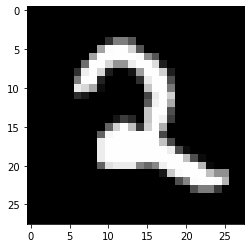

Prediction: [3] | Actual: 3


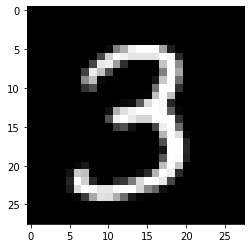

Prediction: [6] | Actual: 6


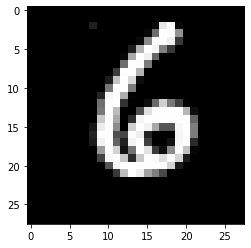

Prediction: [9] | Actual: 9


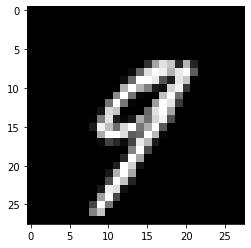

Prediction: [1] | Actual: 1


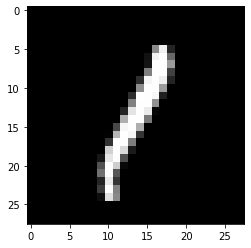

In [300]:
test_results(np.random.randint(0, 9999), results)
test_results(np.random.randint(0, 9999), results)
test_results(np.random.randint(0, 9999), results)
test_results(np.random.randint(0, 9999), results)
test_results(np.random.randint(0, 9999), results)